# Evaluation Report
Compute RMSE/MAE and alert classification metrics.

In [6]:
import sys
import os
from pathlib import Path

# Add parent directory to path for imports
notebook_dir = Path.cwd()
parent_dir = notebook_dir.parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from xgboost import XGBClassifier

from src.alert_classifier import classify_alert

FEATURES = [
    "latitude",
    "longitude",
    "depth_km",
    "prev_magnitude",
    "quake_count_7d",
    "quake_count_30d",
    "avg_magnitude_30d",
    "max_magnitude_30d",
    "days_since_last_quake",
    "month",
    "seismic_zone",
]

# Load data - try multiple paths
data_paths = [
    "../data/processed/features.csv",
    "data/processed/features.csv",
    Path.cwd().parent / "data/processed/features.csv"
]

df = None
for path in data_paths:
    try:
        df = pd.read_csv(path, parse_dates=["time"])
        print(f"✓ Loaded data from {path}")
        break
    except FileNotFoundError:
        continue

if df is None:
    raise FileNotFoundError(f"Could not find features.csv in {data_paths}")

# Load classification model
model_paths = [
    "../models/xgb_model.json",
    "models/xgb_model.json",
    Path.cwd().parent / "models/xgb_model.json"
]

xgb = XGBClassifier()
for path in model_paths:
    try:
        xgb.load_model(path)
        print(f"✓ Loaded XGBClassifier model from {path}")
        break
    except Exception:
        continue

X = df[FEATURES].fillna(0.0)

# Get true alert labels from magnitudes
y_labels = [classify_alert(m) for m in df["magnitude"].values]
label_to_int = {"LOW": 0, "MID": 1, "HIGH": 2}
int_to_label = {0: "LOW", 1: "MID", 2: "HIGH"}
y_true_int = np.array([label_to_int[label] for label in y_labels])

# Get predictions from model
y_pred_int = xgb.predict(X)

# Convert to label strings
y_true = np.array([int_to_label[i] for i in y_true_int])
y_pred = np.array([int_to_label[i] for i in y_pred_int])

# Calculate metrics
accuracy = (y_pred == y_true).sum() / len(y_true)
print(f"\n━" * 45)
print(f"XGBoost Classification Metrics (Full Dataset - {len(y_true)} samples)")
print(f"━" * 45)
print(f"✓ Overall Accuracy: {accuracy:.1%}")
print(f"━" * 45)

✓ Loaded data from ../data/processed/features.csv
✓ Loaded XGBClassifier model from ../models/xgb_model.json

━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
━
XGBoost Classification Metrics (Full Dataset - 12356 samples)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✓ Overall Accuracy: 95.1%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


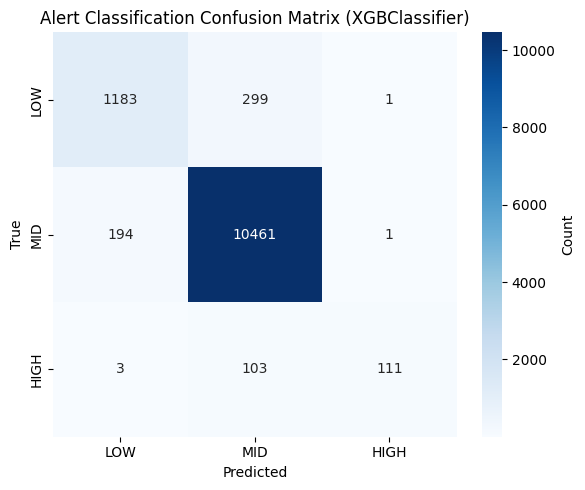


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
CLASSIFICATION REPORT (Low/Mid/High Alert Categories)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
              precision    recall  f1-score   support

         LOW       0.98      0.51      0.67       217
         MID       0.86      0.80      0.83      1483
        HIGH       0.96      0.98      0.97     10656

    accuracy                           0.95     12356
   macro avg       0.93      0.76      0.82     12356
weighted avg       0.95      0.95      0.95     12356

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [7]:
labels = ["LOW", "MID", "HIGH"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues", cbar_kws={"label": "Count"})
plt.title("Alert Classification Confusion Matrix (XGBClassifier)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

print("\n" + "━" * 70)
print("CLASSIFICATION REPORT (Low/Mid/High Alert Categories)")
print("━" * 70)
print(classification_report(y_true, y_pred, target_names=labels))
print("━" * 70)

## Final Notes
Summarize RMSE/MAE and the alert classification accuracy for the report section.